In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

def make_beta_schedule(schedule, n_timestep, linear_start=1e-4, linear_end=2e-2, cosine_s=8e-3):
    if schedule == "linear":
        betas = (
                torch.linspace(linear_start ** 0.5, linear_end ** 0.5, n_timestep, dtype=torch.float64) ** 2
        )

    elif schedule == "cosine":
        timesteps = (
                torch.arange(n_timestep + 1, dtype=torch.float64) / n_timestep + cosine_s
        )
        alphas = timesteps / (1 + cosine_s) * np.pi / 2
        alphas = torch.cos(alphas).pow(2)
        alphas = alphas / alphas[0]
        betas = 1 - alphas[1:] / alphas[:-1]
        betas = np.clip(betas, a_min=0, a_max=0.999)

    elif schedule == "sqrt_linear":
        betas = torch.linspace(linear_start, linear_end, n_timestep, dtype=torch.float64)
    elif schedule == "sqrt":
        betas = torch.linspace(linear_start, linear_end, n_timestep, dtype=torch.float64) ** 0.5
    else:
        raise ValueError(f"schedule '{schedule}' unknown.")
    return betas.numpy()

In [4]:
linear_beta_schedule = make_beta_schedule('linear', 1000)
cosine_beta_schedule = make_beta_schedule('cosine', 1000)
sqrt_linear_beta_schedule = make_beta_schedule('sqrt_linear', 1000)
sqrt_beta_schedule = make_beta_schedule('sqrt', 1000)

linear_beta_schedule[0]

0.0001

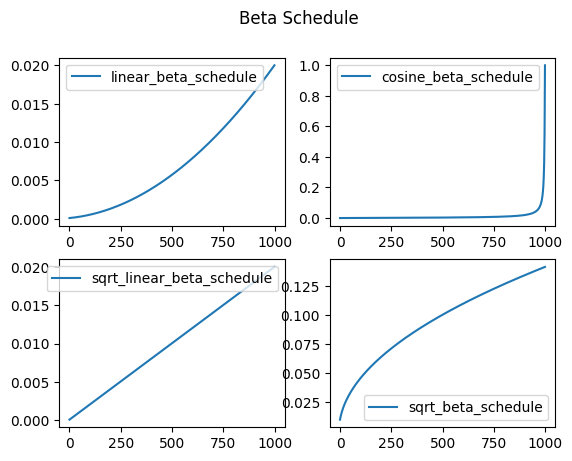

In [3]:
plt.suptitle('Beta Schedule')
plt.subplot(2,2,1)
plt.plot(linear_beta_schedule, label='linear_beta_schedule')
plt.legend()
plt.subplot(2,2,2)
plt.plot(cosine_beta_schedule, label='cosine_beta_schedule')
plt.legend()
plt.subplot(2,2,3)
plt.plot(sqrt_linear_beta_schedule, label='sqrt_linear_beta_schedule')
plt.legend()
plt.subplot(2,2,4)
plt.plot(sqrt_beta_schedule, label='sqrt_beta_schedule')
plt.legend()

In [ ]:
plt.suptitle('sqrt(1 - Beta_t): mean of $x_t | x_{t-1}$')
plt.subplot(2,2,1)
plt.plot(np.sqrt(1 - linear_beta_schedule), label='linear_beta_schedule')
plt.legend()
plt.subplot(2,2,2)
plt.plot(np.sqrt(1 - cosine_beta_schedule), label='cosine_beta_schedule')
plt.legend()
plt.subplot(2,2,3)
plt.plot(np.sqrt(1 - sqrt_linear_beta_schedule), label='sqrt_linear_beta_schedule')
plt.legend()
plt.subplot(2,2,4)
plt.plot(np.sqrt(1 - sqrt_beta_schedule), label='sqrt_beta_schedule')
plt.legend()

In [ ]:
plt.suptitle('sqrt(Beta_t): std of $x_t | x_{t-1}$')
plt.subplot(2,2,1)
plt.plot(np.sqrt(linear_beta_schedule), label='linear_beta_schedule') # this is why it's called 'linear'
plt.legend()
plt.subplot(2,2,2)
plt.plot(np.sqrt(cosine_beta_schedule), label='cosine_beta_schedule')
plt.legend()
plt.subplot(2,2,3)
plt.plot(np.sqrt(sqrt_linear_beta_schedule), label='sqrt_linear_beta_schedule')
plt.legend()
plt.subplot(2,2,4)
plt.plot(np.sqrt(sqrt_beta_schedule), label='sqrt_beta_schedule')
plt.legend()

In [ ]:
linear_alphas = 1 - linear_beta_schedule
cosine_alphas = 1 - cosine_beta_schedule
sqrt_linear_alphas = 1 - sqrt_linear_beta_schedule
sqrt_alphas = 1 - sqrt_beta_schedule

linear_alphas_prod = np.cumprod(linear_alphas, 0)
cosine_alphas_prod = np.cumprod(cosine_alphas, 0)
sqrt_linear_alphas_prod = np.cumprod(sqrt_linear_alphas, 0)
sqrt_alphas_prod = np.cumprod(sqrt_alphas, 0)



In [ ]:
plt.suptitle('alphas')
plt.subplot(2,2,1)
plt.plot(linear_alphas, label='linear_alphas')
plt.legend()
plt.subplot(2,2,2)
plt.plot(cosine_alphas, label='cosine_alphas')
plt.legend()
plt.subplot(2,2,3)
plt.plot(sqrt_linear_alphas, label='sqrt_linear_alphas')
plt.legend()
plt.subplot(2,2,4)
plt.plot(sqrt_alphas, label='sqrt_alphas')
plt.legend()

In [ ]:
plt.suptitle('sqrt alphas_prod (Mean of x_t | x_0)')
plt.subplot(2,2,1)
plt.plot(np.sqrt(linear_alphas_prod), label='linear_alphas')
plt.legend()
plt.subplot(2,2,2)
plt.plot(np.sqrt(cosine_alphas_prod), label='cosine_alphas')
plt.legend()
plt.subplot(2,2,3)
plt.plot(np.sqrt(sqrt_linear_alphas_prod), label='sqrt_linear_alphas')
plt.legend()
plt.subplot(2,2,4)
plt.plot(np.sqrt(sqrt_alphas_prod), label='sqrt_alphas')
plt.legend()

In [ ]:
plt.suptitle('1 - alphas_prod (var of x_t | x_0)')
plt.subplot(2,2,1)
plt.plot(1 - linear_alphas_prod, label='linear_alphas')
plt.legend()
plt.subplot(2,2,2)
plt.plot(1 - cosine_alphas_prod, label='cosine_alphas')
plt.legend()
plt.subplot(2,2,3)
plt.plot(1 -sqrt_linear_alphas_prod, label='sqrt_linear_alphas')
plt.legend()
plt.subplot(2,2,4)
plt.plot(1 -sqrt_alphas_prod, label='sqrt_alphas')
plt.legend()

In [ ]:
plt.suptitle('sqrt(1 - alphas_prod) (std of x_t | x_0)')
plt.subplot(2,2,1)
plt.plot(np.sqrt(1 - linear_alphas_prod), label='linear_alphas')
plt.legend()
plt.subplot(2,2,2)
plt.plot(np.sqrt(1 - cosine_alphas_prod), label='cosine_alphas')
plt.legend()
plt.subplot(2,2,3)
plt.plot(np.sqrt(1 -sqrt_linear_alphas_prod), label='sqrt_linear_alphas')
plt.legend()
plt.subplot(2,2,4)
plt.plot(np.sqrt(1 -sqrt_alphas_prod), label='sqrt_alphas')
plt.legend()

In [2]:
import math

def get_named_beta_schedule(schedule_name, num_diffusion_timesteps):
    '''
    Get a pre-defined beta schedule for the given name.

    The beta schedule library consists of beta schedules which remain similar
    in the limit of num_diffusion_timesteps.

    Beta schedules may be added, but should not be removed or changed once
    they are comitted to maintain backwards compatibility.
    '''
    if schedule_name == 'linear':
        # linear schedule from Ho et al, extended to work for any number of
        # diffusion steps.
        scale = 1000 / num_diffusion_timesteps
        beta_start = scale * 0.0001
        beta_end = scale * 0.02
        return np.linspace(beta_start, beta_end, num_diffusion_timesteps, dtype=np.float64)

    elif schedule_name == 'cosine':
        return betas_for_alpha_bar(
            num_diffusion_timesteps,
            lambda t: math.cos((t + 0.008) / 1.008 * math.pi /2 ) ** 2,
        )
    
    else:
        raise NotImplementedError(f'unknown beta schedule: {schedule_name}')

def betas_for_alpha_bar(num_diffusion_timesteps, alpha_bar, max_beta=0.999):
    '''
    Create a beta schedule that discretizes the given alpha_t_bar function, which 
    defines the cumulative product of (1-beta) over time from t = [0, 1].

    :param num_diffusion_timesteps: the number of betas to produce.
    :param alpha_bar: a lambda that takes an argument t from 0 to 1 and
                      produces the cumulative product of (1-beta) up to that
                      part of the diffusion process.
    : param max_beta: the maximum beta to use; use values lower than 1 to
                      prevent singularities
    '''
    betas = []
    for i in range(num_diffusion_timesteps):
        t1 = i / num_diffusion_timesteps
        t2 = (i + 1) / num_diffusion_timesteps
        betas.append(min(1 - alpha_bar(t2) / alpha_bar(t1), max_beta))
    
    return np.array(betas)

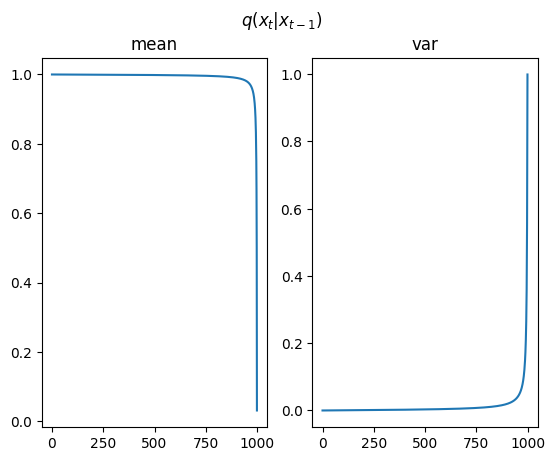

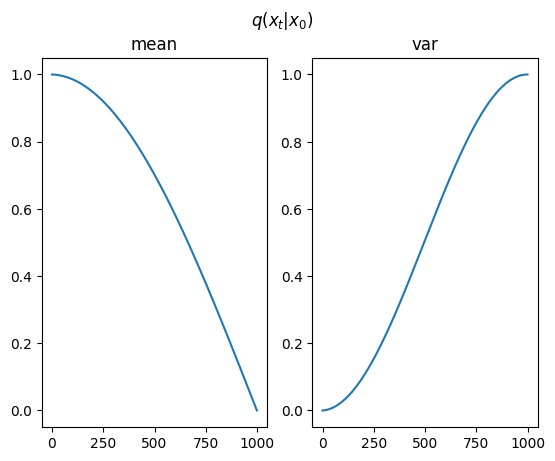

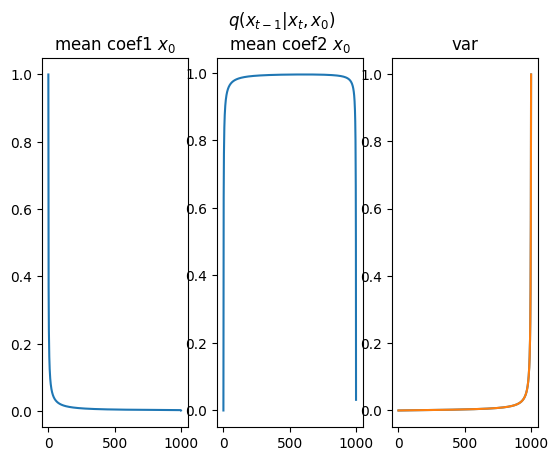

In [19]:
# q(x_t | x_{t-1}) := N(sqrt(1-beta), beta) = N(sqrt(alpha), 1-alpha)
betas = get_named_beta_schedule('cosine', 1000)
alphas = 1.0 - betas
plt.suptitle('$q(x_t | x_{t-1})$')
plt.subplot(1,2,1)
plt.plot(np.sqrt(alphas))
plt.title('mean')

plt.subplot(1,2,2)
plt.plot(betas)
plt.title('var')
plt.show()

# q(x_t | x_0) := N(sqrt(alphas_cumprod), (1-alphas_cumprod))
alphas_cumprod = np.cumprod(alphas, axis=0)
alphas_cumprod_prev = np.append(1.0, alphas_cumprod[:-1])
alphas_cumprod_next = np.append( alphas_cumprod[1:], 0.0)
sqrt_alphas_cumprod = np.sqrt(alphas_cumprod)
sqrt_one_minus_alphas_cumprod = np.sqrt(1.0 - alphas_cumprod)
plt.suptitle('$q(x_t | x_0)$')
plt.subplot(1,2,1)
plt.title('mean')
plt.plot(sqrt_alphas_cumprod)
plt.subplot(1,2,2)
plt.title('var')
plt.plot((1.0 - alphas_cumprod))
plt.show()

# ?
log_one_minus_alphas_cumprod = np.log(1.0 - alphas_cumprod)
sqrt_recip_alphas_cumprod = np.sqrt(1.0 / alphas_cumprod)
sqrt_recipm1_alphas_cumprod = np.sqrt(1.0 / alphas_cumprod - 1)

# q(x_{t-1} |x_t, x_0)
## var
posterior_variance = (
    betas * (1.0 - alphas_cumprod_prev) / (1.0 - alphas_cumprod)
)   

posterior_log_variance_clipped = np.log(
    np.append(posterior_variance[1], posterior_variance[1:])
)   

## mean coef1 x_0
posterior_mean_coef1 = (
        betas * np.sqrt(alphas_cumprod_prev) / (1.0 - alphas_cumprod)
)
posterior_mean_coef2 = (
    (1.0 - alphas_cumprod_prev)
    * np.sqrt(alphas)
    / (1.0 - alphas_cumprod)
)

plt.suptitle('$q(x_{t-1} | x_t, x_0)$')
plt.subplot(1,3,1)
plt.title('mean coef1 $x_0$')
plt.plot(posterior_mean_coef1)

plt.subplot(1,3,2)
plt.title('mean coef2 $x_0$')
plt.plot(posterior_mean_coef2)

plt.subplot(1,3,3)
plt.title('var')
plt.plot(posterior_variance)
plt.plot(betas)
plt.show()

